In [193]:
import os

import IPython
import IPython.display

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pandas as pd
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid']=False

In [194]:
# !pip install skforecast

In [195]:
def convert_to_date(x):
    return datetime.strptime(x, '%Y %m %d')

In [196]:
df = pd.read_csv("C:/Users/abdir/Downloads/archive (35)/Rainfall_data.csv",parse_dates=[["Year", "Month", "Day"]],
                 date_parser=convert_to_date, keep_date_col=True)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year_Month_Day     252 non-null    datetime64[ns]
 1   Year               252 non-null    object        
 2   Month              252 non-null    object        
 3   Day                252 non-null    object        
 4   Specific Humidity  252 non-null    float64       
 5   Relative Humidity  252 non-null    float64       
 6   Temperature        252 non-null    float64       
 7   Precipitation      252 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 15.9+ KB


In [198]:
df.shape

(252, 8)

In [199]:
df.tail(n=5)

,Year_Month_Day,Year,Month,Day,Specific Humidity,Relative Humidity,Temperature,Precipitation
247,2020-08-01,2020,8,1,20.08,92.31,5.34,1203.09
248,2020-09-01,2020,9,1,19.71,90.12,9.22,361.30
249,2020-10-01,2020,10,1,18.43,82.69,12.62,180.18
250,2020-11-01,2020,11,1,14.83,76.06,16.95,0.49
251,2020-12-01,2020,12,1,12.21,69.38,17.77,12.23


In [200]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Specific Humidity,252.0,14.416746,4.382599,5.74,10.0100,15.200,18.875,20.57
Relative Humidity,252.0,67.259524,17.307101,34.69,51.8450,66.655,84.610,92.31
Temperature,252.0,16.317262,6.584842,4.73,10.8650,16.915,22.115,29.34
Precipitation,252.0,206.798929,318.093091,0.00,0.4025,11.495,353.200,1307.43


In [201]:
df.head(n=5)

,Year_Month_Day,Year,Month,Day,Specific Humidity,Relative Humidity,Temperature,Precipitation
0,2000-01-01,2000,1,1,8.06,48.25,23.93,0.00
1,2000-02-01,2000,2,1,8.73,50.81,25.83,0.11
2,2000-03-01,2000,3,1,8.48,42.88,26.68,0.01
3,2000-04-01,2000,4,1,13.79,55.69,22.49,0.02
4,2000-05-01,2000,5,1,17.40,70.88,19.07,271.14


In [202]:
df.set_index("Year_Month_Day", inplace = True)

array([<AxesSubplot: xlabel='Year_Month_Day'>], dtype=object)

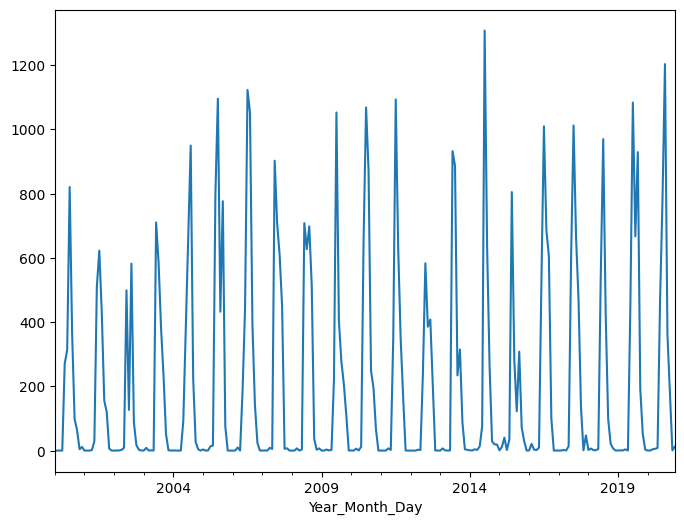

In [203]:
df_year_one = df['2000':'2020']
df_year_one['Precipitation'].plot(subplots=True)

In [204]:
df_year = df['2000':'2020']

array([<AxesSubplot: xlabel='Year_Month_Day'>,
       <AxesSubplot: xlabel='Year_Month_Day'>,
       <AxesSubplot: xlabel='Year_Month_Day'>,
       <AxesSubplot: xlabel='Year_Month_Day'>], dtype=object)

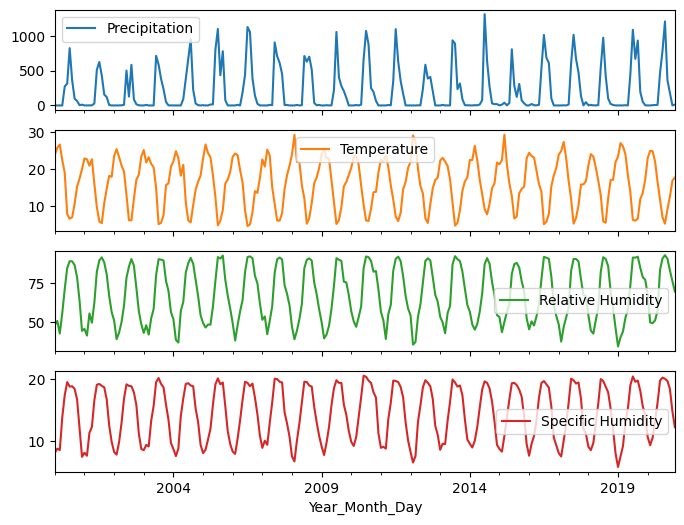

In [205]:
df_year_prec = df_year[["Precipitation","Temperature", "Relative Humidity","Specific Humidity"]]
df_year_prec.plot(subplots=True)

In [206]:
training_set = df.iloc[:, -1].values

In [207]:
training_set

array([0.00000e+00, 1.10000e-01, 1.00000e-02, 2.00000e-02, 2.71140e+02,
       3.13670e+02, 8.20450e+02, 3.62380e+02, 9.78500e+01, 6.34100e+01,
       4.37000e+00, 1.12500e+01, 0.00000e+00, 0.00000e+00, 3.00000e-02,
       1.57000e+00, 2.91100e+01, 5.10090e+02, 6.22310e+02, 4.29620e+02,
       1.55880e+02, 1.20240e+02, 6.15000e+00, 0.00000e+00, 3.00000e-02,
       1.10000e-01, 4.70000e-01, 2.06000e+00, 8.63000e+00, 4.98920e+02,
       1.26770e+02, 5.81790e+02, 8.77100e+01, 1.72900e+01, 2.59000e+00,
       2.10000e-01, 3.00000e-02, 8.41000e+00, 1.10000e-01, 7.60000e-01,
       1.00000e-02, 7.10100e+02, 5.84850e+02, 3.80550e+02, 2.33140e+02,
       5.09600e+01, 1.10000e+00, 1.60000e-01, 3.70000e-01, 3.00000e-02,
       0.00000e+00, 6.00000e-02, 9.22800e+01, 3.76960e+02, 6.63260e+02,
       9.49590e+02, 2.25060e+02, 2.73000e+01, 4.29000e+00, 1.00000e-02,
       3.47000e+00, 0.00000e+00, 4.10000e-01, 1.35600e+01, 1.56500e+01,
       7.99320e+02, 1.09538e+03, 4.32240e+02, 7.76410e+02, 7.544

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

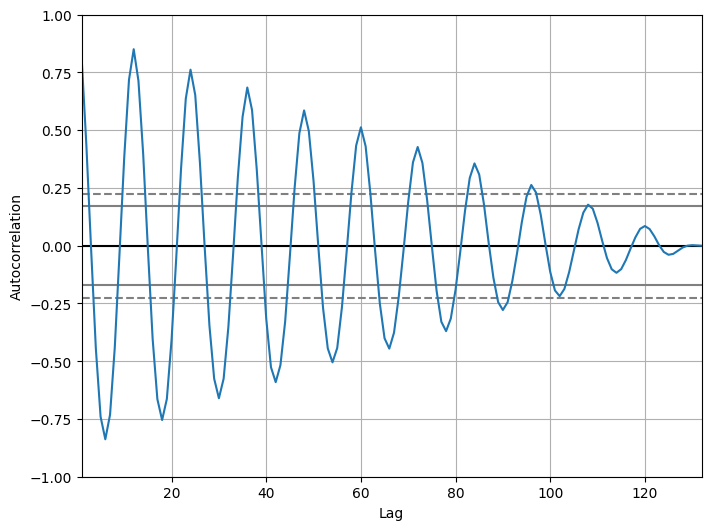

In [208]:
pd.plotting.autocorrelation_plot(df["2010": "2020"]['Temperature'].resample('1m').mean())

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

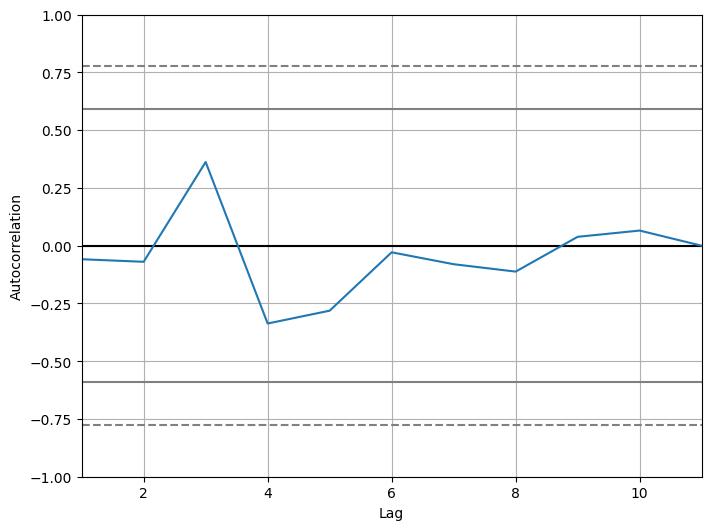

In [209]:
pd.plotting.autocorrelation_plot(df["2010": "2020"]['Temperature'].resample('1y').mean())

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

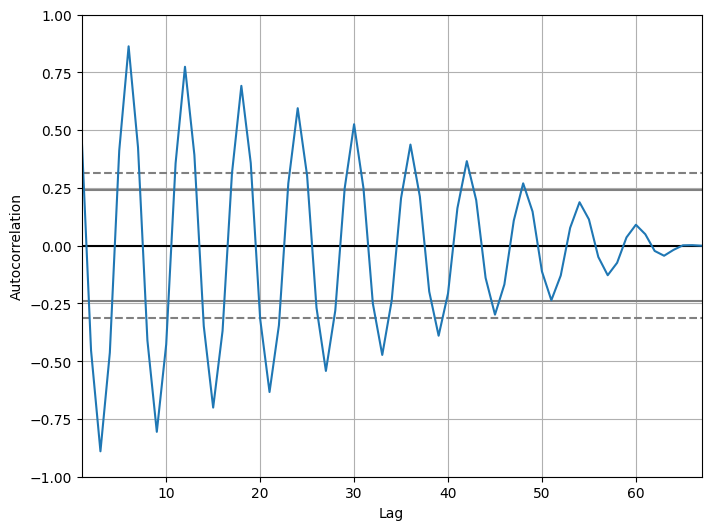

In [210]:
pd.plotting.autocorrelation_plot(df["2010": "2020"]['Temperature'].resample('2m').mean())

# Testing if the data is stationary -ie constant mean and with no trend

# Null Hypothesis (HO): Series is non-stationary, or series has a unit root.


# Alternate Hypothesis(HA): Series is stationary, or series has no unit root.


In [211]:
#USING AUGMENTED FULLER FORMULA
import statsmodels.api as sm

In [212]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
# Call the function and run the test

adf_test(df['Temperature'])

Results of Dickey-Fuller Test:
Test Statistic                  -4.469188
p-value                          0.000223
#Lags Used                      15.000000
Number of Observations Used    236.000000
Critical Value (1%)             -3.458366
Critical Value (5%)             -2.873866
Critical Value (10%)            -2.573339
dtype: float64


In [213]:
#In conclusion: USING ADF It states that the series is stationary 
#P-Value > 0.05;
#Critical Value > T-test ; Therefore we reject the null hypothesis

# USING KPSS - Kwiatkowski-Phillips-Schmidt-Shin (KPSS)

# Null Hypothesis (HO): Series is trend stationary or series has no unit root.


# Alternate Hypothesis(HA): Series is non-stationary, or series has a unit root.

In [214]:
from statsmodels.tsa.stattools import kpss

In [215]:
def kpss_test(series):
    print ('Results of KPSS Test:')
    kpsstest = kpss(series, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [216]:
kpss_test(df['Temperature'])

Results of KPSS Test:
Test Statistic           0.019533
p-value                  0.100000
#Lags Used               6.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\abdir\.anaconda\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [217]:
#In conclusion: USING KPSS It states that the series is stationary 
#P-Value > 0.05;
#Critical Value > T-test ; Therefore we reject the null hypothesis

# checking for seasonality

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

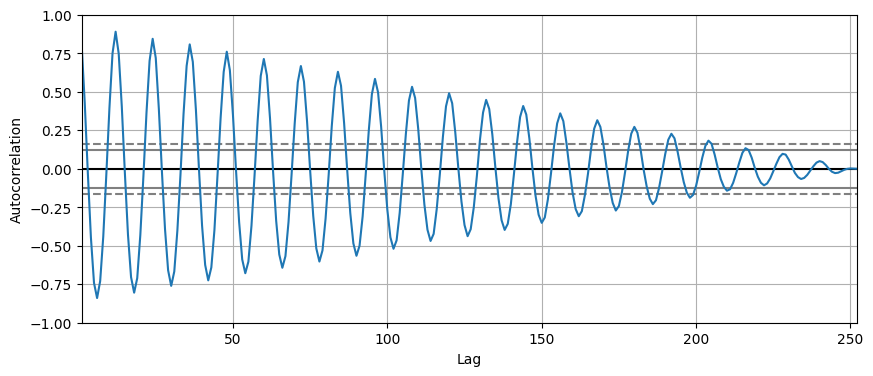

In [218]:
from pandas.plotting import autocorrelation_plot

plt.rcParams.update({'figure.figsize':(10,4), 'figure.dpi':100})
autocorrelation_plot(df['Temperature'].tolist())

In [219]:
#IN CONCLUSION - There is seasonality, A s one can notice there is peakness after every 6 months.
#The seasonality index varies between o.75 and 0.25 most of the time and it is reducing due to theincreased number of lags

# Deseasoning the series

In [220]:
# from statsmodels.tsa.seasonal import seasonal_decompose 
# result_mul = seasonal_decompose(df['Precipitation'],model='additive', extrapolate_trend='freq')
# deseason = df['Precipitation'] - result_mul.seasonal
# plt.figure(figsize=(15,6))
# plt.plot(deseason)
# plt.title('Deseasoning using seasonal_decompose', fontsize=16)
# plt.xlabel('Years')
# plt.ylabel('Amount of Precipitation')
# plt.show()


In [221]:
#There is no trend

# detecting cyclic variations

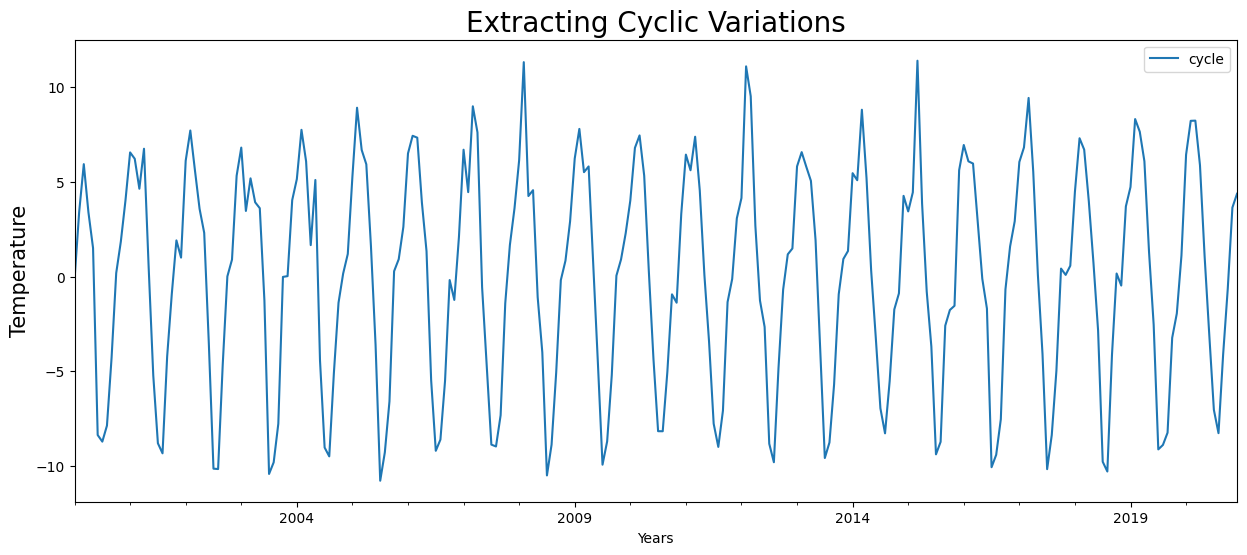

In [222]:
from statsmodels.tsa.filters.hp_filter import hpfilter
sw_cycle,sw_trend = hpfilter(df['Temperature'], lamb=100)
df['cycle'] =sw_cycle
df['trend'] =sw_trend
df[['cycle']].plot(figsize=(15,6)).autoscale(axis='x',tight=True)
plt.title('Extracting Cyclic Variations', fontsize=20)
plt.xlabel('Years')
plt.ylabel('Temperature', fontsize =15)
plt.show()

# Detecting trend in the series

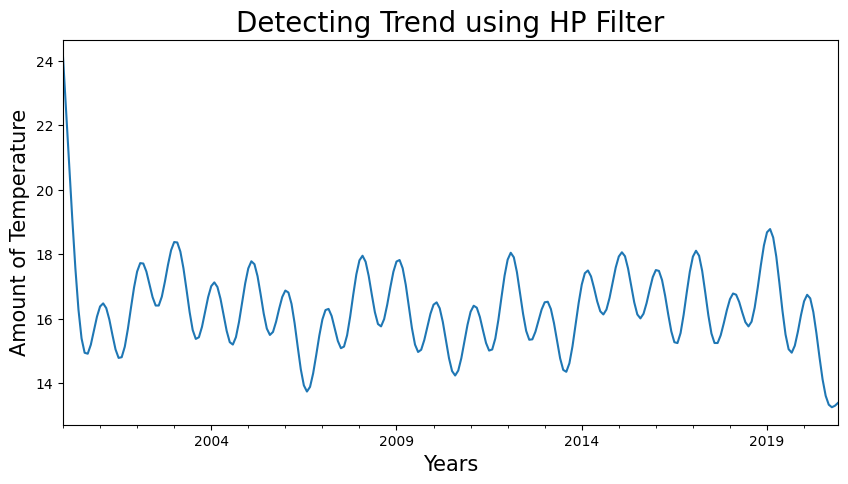

In [223]:
from statsmodels.tsa.filters.hp_filter import hpfilter
sw_cycle,sw_trend = hpfilter(df['Temperature'], lamb=100)
sw_trend.plot(figsize=(10,5)).autoscale(axis='x',tight=True) 
plt.title('Detecting Trend using HP Filter', fontsize=20)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Amount of Temperature', fontsize=15)
plt.show()


In [224]:
#There is no much of a trend in the whole dataset which is noticeable

C:\Users\abdir\AppData\Local\Temp\ipykernel_9404\2946701920.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [Year for Year, df in df.groupby(['Year'])]
C:\Users\abdir\AppData\Local\Temp\ipykernel_9404\2946701920.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(keys,df.groupby(['Year']).sum()['Temperature'])


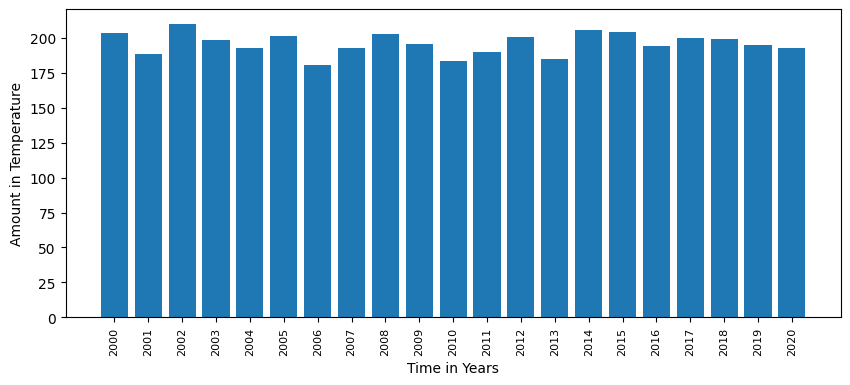

In [225]:
import matplotlib.pyplot as plt

keys = [Year for Year, df in df.groupby(['Year'])]

plt.bar(keys,df.groupby(['Year']).sum()['Temperature'])
plt.ylabel('Amount in Temperature')
plt.xlabel('Time in Years')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

C:\Users\abdir\.anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


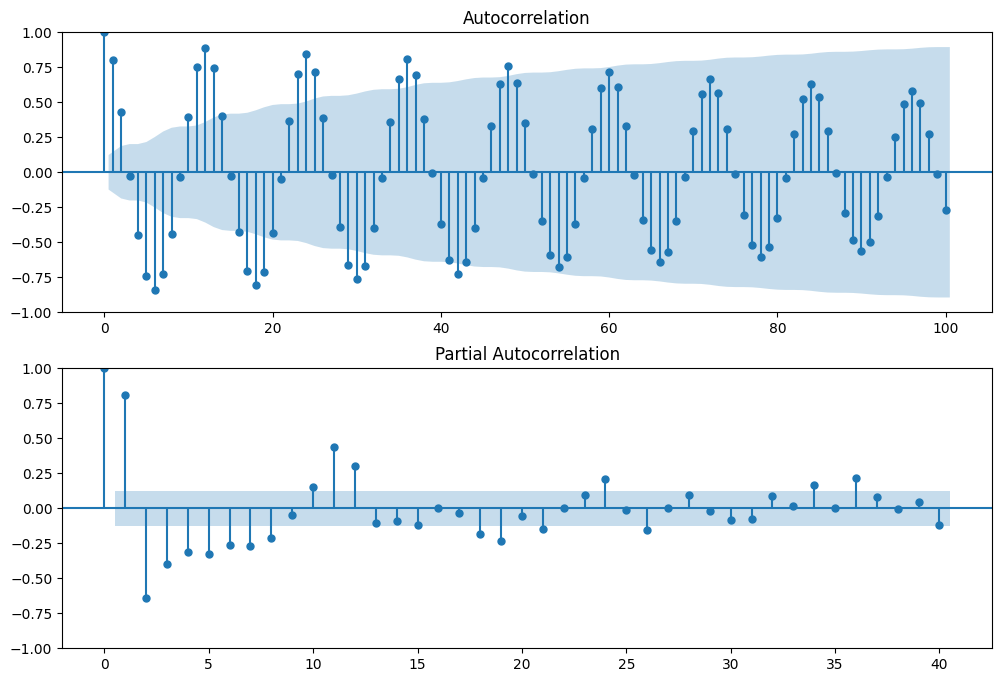

In [226]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Temperature'],lags=100,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Temperature'],lags=40,ax=ax2)

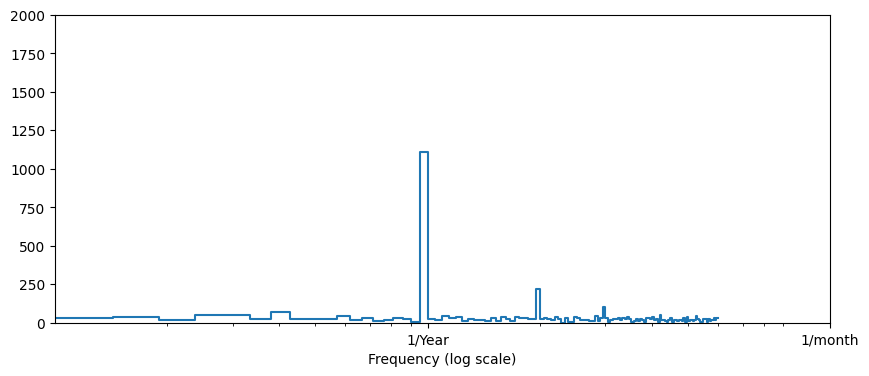

In [227]:
fft = tf.signal.rfft(df['Temperature'])
f_per_dataset = np.arange(0, len(fft))

n_samples_months = len(df['Temperature'])
month_per_year = 12
years_per_dataset = n_samples_months/(month_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 2000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 12], labels=['1/Year', '1/month'])
_ = plt.xlabel('Frequency (log scale)')

In [228]:
training_set = training_set.reshape(len(training_set),1)

In [229]:
training_set

array([[0.00000e+00],
       [1.10000e-01],
       [1.00000e-02],
       [2.00000e-02],
       [2.71140e+02],
       [3.13670e+02],
       [8.20450e+02],
       [3.62380e+02],
       [9.78500e+01],
       [6.34100e+01],
       [4.37000e+00],
       [1.12500e+01],
       [0.00000e+00],
       [0.00000e+00],
       [3.00000e-02],
       [1.57000e+00],
       [2.91100e+01],
       [5.10090e+02],
       [6.22310e+02],
       [4.29620e+02],
       [1.55880e+02],
       [1.20240e+02],
       [6.15000e+00],
       [0.00000e+00],
       [3.00000e-02],
       [1.10000e-01],
       [4.70000e-01],
       [2.06000e+00],
       [8.63000e+00],
       [4.98920e+02],
       [1.26770e+02],
       [5.81790e+02],
       [8.77100e+01],
       [1.72900e+01],
       [2.59000e+00],
       [2.10000e-01],
       [3.00000e-02],
       [8.41000e+00],
       [1.10000e-01],
       [7.60000e-01],
       [1.00000e-02],
       [7.10100e+02],
       [5.84850e+02],
       [3.80550e+02],
       [2.33140e+02],
       [5.

In [230]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [231]:
training_set_scaled

array([[0.00000000e+00],
       [8.41345235e-05],
       [7.64859304e-06],
       [1.52971861e-05],
       [2.07383952e-01],
       [2.39913418e-01],
       [6.27528816e-01],
       [2.77169715e-01],
       [7.48414829e-02],
       [4.84997285e-02],
       [3.34243516e-03],
       [8.60466717e-03],
       [0.00000000e+00],
       [0.00000000e+00],
       [2.29457791e-05],
       [1.20082911e-03],
       [2.22650543e-02],
       [3.90147082e-01],
       [4.75979594e-01],
       [3.28598854e-01],
       [1.19226268e-01],
       [9.19666827e-02],
       [4.70388472e-03],
       [0.00000000e+00],
       [2.29457791e-05],
       [8.41345235e-05],
       [3.59483873e-04],
       [1.57561017e-03],
       [6.60073579e-03],
       [3.81603604e-01],
       [9.69612140e-02],
       [4.44987495e-01],
       [6.70858096e-02],
       [1.32244174e-02],
       [1.98098560e-03],
       [1.60620454e-04],
       [2.29457791e-05],
       [6.43246675e-03],
       [8.41345235e-05],
       [5.81293071e-04],


In [234]:
# [[[1],[2],[3],[4],[5]]] [6]
# [[[2],[3],[4],[5],[6]]] [7]
# [[[3],[4],[5],[6],[7]]] [8]

def df_to_X_y(training_set_scaled, window_size=5):
    df_as_np = training_set_scaled
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i+5]]
        X.append(row)
        label = df_as_np[i+5]
        y.append(label)
    return np.array(X), np.array(y)
    

In [235]:
WINDOW_SIZE = 5
X, y = df_to_X_y(training_set_scaled, WINDOW_SIZE)
X.shape, y.shape

((247, 5, 1, 1), (247, 1))

In [236]:
x_train, y_train = X[:150], y[:150]
x_val, y_val = X[150:200], y[150:200]
x_test, y_test = X[200:], y[200:]
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((150, 5, 1, 1), (150, 1), (50, 5, 1, 1), (50, 1), (47, 5, 1, 1), (47, 1))

In [237]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [238]:
model1 = Sequential()
model1.add(InputLayer((5,1)))

In [239]:
model1.add(LSTM(units=50, return_sequences = True))
model1.add(Dropout(0.2))

In [240]:
model1.add(LSTM(units=50, return_sequences = True))
model1.add(Dropout(0.2))

In [241]:
model1.add(LSTM(units=50, return_sequences = True))
model1.add(Dropout(0.2))

In [242]:
model1.add(LSTM(units=50, return_sequences = True))
model1.add(Dropout(0.2))

In [243]:
model1.add(Dense(1, 'relu'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5, 50)             10400     
                                                                 
 dropout_4 (Dropout)         (None, 5, 50)             0         
                                                                 
 lstm_5 (LSTM)               (None, 5, 50)             20200     
                                                                 
 dropout_5 (Dropout)         (None, 5, 50)             0         
                                                                 
 lstm_6 (LSTM)               (None, 5, 50)             20200     
                                                                 
 dropout_6 (Dropout)         (None, 5, 50)             0         
                                                                 
 lstm_7 (LSTM)               (None, 5, 50)            

In [244]:
cp = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [245]:
model1.fit(x_train, y_train, validation_data =( x_val, y_val), epochs = 100, callbacks=[cp])

Epoch 1/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0794 - root_mean_squared_error: 0.2818 

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 31s 5s/step - loss: 0.0794 - root_mean_squared_error: 0.2817 - val_loss: 0.0809 - val_root_mean_squared_error: 0.2845
Epoch 2/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0760 - root_mean_squared_error: 0.2756

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0782 - root_mean_squared_error: 0.2797 - val_loss: 0.0799 - val_root_mean_squared_error: 0.2827
Epoch 3/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0740 - root_mean_squared_error: 0.2720

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 22s 5s/step - loss: 0.0772 - root_mean_squared_error: 0.2778 - val_loss: 0.0788 - val_root_mean_squared_error: 0.2808
Epoch 4/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0652 - root_mean_squared_error: 0.2553

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 20s 5s/step - loss: 0.0760 - root_mean_squared_error: 0.2757 - val_loss: 0.0778 - val_root_mean_squared_error: 0.2789
Epoch 5/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0839 - root_mean_squared_error: 0.2897

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0749 - root_mean_squared_error: 0.2736 - val_loss: 0.0767 - val_root_mean_squared_error: 0.2770
Epoch 6/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0794 - root_mean_squared_error: 0.2817

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 20s 5s/step - loss: 0.0738 - root_mean_squared_error: 0.2717 - val_loss: 0.0757 - val_root_mean_squared_error: 0.2752
Epoch 7/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0787 - root_mean_squared_error: 0.2806

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 21s 5s/step - loss: 0.0726 - root_mean_squared_error: 0.2695 - val_loss: 0.0747 - val_root_mean_squared_error: 0.2733
Epoch 8/100
3/5 [=================>............] - ETA: 0s - loss: 0.0739 - root_mean_squared_error: 0.2718

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0714 - root_mean_squared_error: 0.2672 - val_loss: 0.0737 - val_root_mean_squared_error: 0.2714
Epoch 9/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0793 - root_mean_squared_error: 0.2816

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 20s 5s/step - loss: 0.0704 - root_mean_squared_error: 0.2653 - val_loss: 0.0726 - val_root_mean_squared_error: 0.2695
Epoch 10/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0702 - root_mean_squared_error: 0.2649

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 20s 5s/step - loss: 0.0692 - root_mean_squared_error: 0.2630 - val_loss: 0.0716 - val_root_mean_squared_error: 0.2677
Epoch 11/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0679 - root_mean_squared_error: 0.2605

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 20s 5s/step - loss: 0.0679 - root_mean_squared_error: 0.2605 - val_loss: 0.0707 - val_root_mean_squared_error: 0.2658
Epoch 12/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0637 - root_mean_squared_error: 0.2523

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 20s 5s/step - loss: 0.0669 - root_mean_squared_error: 0.2586 - val_loss: 0.0697 - val_root_mean_squared_error: 0.2639
Epoch 13/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0730 - root_mean_squared_error: 0.2702

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 20s 5s/step - loss: 0.0660 - root_mean_squared_error: 0.2569 - val_loss: 0.0687 - val_root_mean_squared_error: 0.2621
Epoch 14/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0633 - root_mean_squared_error: 0.2516

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 20s 5s/step - loss: 0.0648 - root_mean_squared_error: 0.2545 - val_loss: 0.0679 - val_root_mean_squared_error: 0.2605
Epoch 15/100
5/5 [==============================] - ETA: 0s - loss: 0.0638 - root_mean_squared_error: 0.2526

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0638 - root_mean_squared_error: 0.2526 - val_loss: 0.0671 - val_root_mean_squared_error: 0.2590
Epoch 16/100
3/5 [=================>............] - ETA: 0s - loss: 0.0661 - root_mean_squared_error: 0.2570

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 21s 5s/step - loss: 0.0628 - root_mean_squared_error: 0.2506 - val_loss: 0.0664 - val_root_mean_squared_error: 0.2577
Epoch 17/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0617 - root_mean_squared_error: 0.2484

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 20s 5s/step - loss: 0.0619 - root_mean_squared_error: 0.2488 - val_loss: 0.0658 - val_root_mean_squared_error: 0.2566
Epoch 18/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0556 - root_mean_squared_error: 0.2357

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0612 - root_mean_squared_error: 0.2474 - val_loss: 0.0654 - val_root_mean_squared_error: 0.2557
Epoch 19/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0639 - root_mean_squared_error: 0.2528

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0607 - root_mean_squared_error: 0.2463 - val_loss: 0.0650 - val_root_mean_squared_error: 0.2549
Epoch 20/100
3/5 [=================>............] - ETA: 0s - loss: 0.0736 - root_mean_squared_error: 0.2713

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 20s 5s/step - loss: 0.0603 - root_mean_squared_error: 0.2456 - val_loss: 0.0646 - val_root_mean_squared_error: 0.2542
Epoch 21/100
3/5 [=================>............] - ETA: 0s - loss: 0.0524 - root_mean_squared_error: 0.2289

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0601 - root_mean_squared_error: 0.2451 - val_loss: 0.0644 - val_root_mean_squared_error: 0.2538
Epoch 22/100
3/5 [=================>............] - ETA: 0s - loss: 0.0597 - root_mean_squared_error: 0.2444

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 21s 5s/step - loss: 0.0595 - root_mean_squared_error: 0.2439 - val_loss: 0.0642 - val_root_mean_squared_error: 0.2533
Epoch 23/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0487 - root_mean_squared_error: 0.2207

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0595 - root_mean_squared_error: 0.2440 - val_loss: 0.0640 - val_root_mean_squared_error: 0.2529
Epoch 24/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0625 - root_mean_squared_error: 0.2501

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 20s 5s/step - loss: 0.0590 - root_mean_squared_error: 0.2428 - val_loss: 0.0638 - val_root_mean_squared_error: 0.2525
Epoch 25/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0590 - root_mean_squared_error: 0.2429

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 20s 5s/step - loss: 0.0587 - root_mean_squared_error: 0.2424 - val_loss: 0.0635 - val_root_mean_squared_error: 0.2521
Epoch 26/100
3/5 [=================>............] - ETA: 0s - loss: 0.0632 - root_mean_squared_error: 0.2514

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0587 - root_mean_squared_error: 0.2424 - val_loss: 0.0633 - val_root_mean_squared_error: 0.2516
Epoch 27/100
3/5 [=================>............] - ETA: 0s - loss: 0.0586 - root_mean_squared_error: 0.2420

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 20s 5s/step - loss: 0.0586 - root_mean_squared_error: 0.2422 - val_loss: 0.0631 - val_root_mean_squared_error: 0.2512
Epoch 28/100
5/5 [==============================] - ETA: 0s - loss: 0.0580 - root_mean_squared_error: 0.2408

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 21s 5s/step - loss: 0.0580 - root_mean_squared_error: 0.2408 - val_loss: 0.0629 - val_root_mean_squared_error: 0.2507
Epoch 29/100
5/5 [==============================] - ETA: 0s - loss: 0.0580 - root_mean_squared_error: 0.2407

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0580 - root_mean_squared_error: 0.2407 - val_loss: 0.0626 - val_root_mean_squared_error: 0.2502
Epoch 30/100
3/5 [=================>............] - ETA: 0s - loss: 0.0589 - root_mean_squared_error: 0.2426

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 20s 5s/step - loss: 0.0576 - root_mean_squared_error: 0.2399 - val_loss: 0.0624 - val_root_mean_squared_error: 0.2497
Epoch 31/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0591 - root_mean_squared_error: 0.2432

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0572 - root_mean_squared_error: 0.2391 - val_loss: 0.0621 - val_root_mean_squared_error: 0.2492
Epoch 32/100
3/5 [=================>............] - ETA: 0s - loss: 0.0631 - root_mean_squared_error: 0.2512

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 20s 5s/step - loss: 0.0573 - root_mean_squared_error: 0.2394 - val_loss: 0.0619 - val_root_mean_squared_error: 0.2487
Epoch 33/100
5/5 [==============================] - ETA: 0s - loss: 0.0570 - root_mean_squared_error: 0.2387

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 22s 6s/step - loss: 0.0570 - root_mean_squared_error: 0.2387 - val_loss: 0.0616 - val_root_mean_squared_error: 0.2482
Epoch 34/100
3/5 [=================>............] - ETA: 0s - loss: 0.0517 - root_mean_squared_error: 0.2273

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 27s 7s/step - loss: 0.0569 - root_mean_squared_error: 0.2385 - val_loss: 0.0613 - val_root_mean_squared_error: 0.2476
Epoch 35/100
3/5 [=================>............] - ETA: 0s - loss: 0.0654 - root_mean_squared_error: 0.2557

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 20s 5s/step - loss: 0.0562 - root_mean_squared_error: 0.2370 - val_loss: 0.0611 - val_root_mean_squared_error: 0.2471
Epoch 36/100
5/5 [==============================] - ETA: 0s - loss: 0.0563 - root_mean_squared_error: 0.2374

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 20s 5s/step - loss: 0.0563 - root_mean_squared_error: 0.2374 - val_loss: 0.0608 - val_root_mean_squared_error: 0.2466
Epoch 37/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0552 - root_mean_squared_error: 0.2349

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 20s 5s/step - loss: 0.0560 - root_mean_squared_error: 0.2367 - val_loss: 0.0605 - val_root_mean_squared_error: 0.2460
Epoch 38/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0595 - root_mean_squared_error: 0.2440

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 20s 5s/step - loss: 0.0550 - root_mean_squared_error: 0.2345 - val_loss: 0.0603 - val_root_mean_squared_error: 0.2455
Epoch 39/100
3/5 [=================>............] - ETA: 0s - loss: 0.0604 - root_mean_squared_error: 0.2458

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 20s 5s/step - loss: 0.0553 - root_mean_squared_error: 0.2352 - val_loss: 0.0600 - val_root_mean_squared_error: 0.2450
Epoch 40/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0559 - root_mean_squared_error: 0.2365

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0549 - root_mean_squared_error: 0.2343 - val_loss: 0.0598 - val_root_mean_squared_error: 0.2444
Epoch 41/100
5/5 [==============================] - ETA: 0s - loss: 0.0543 - root_mean_squared_error: 0.2331

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 20s 5s/step - loss: 0.0543 - root_mean_squared_error: 0.2331 - val_loss: 0.0595 - val_root_mean_squared_error: 0.2439
Epoch 42/100
3/5 [=================>............] - ETA: 0s - loss: 0.0525 - root_mean_squared_error: 0.2292

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0542 - root_mean_squared_error: 0.2327 - val_loss: 0.0592 - val_root_mean_squared_error: 0.2434
Epoch 43/100
3/5 [=================>............] - ETA: 0s - loss: 0.0572 - root_mean_squared_error: 0.2392

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 21s 5s/step - loss: 0.0543 - root_mean_squared_error: 0.2330 - val_loss: 0.0590 - val_root_mean_squared_error: 0.2429
Epoch 44/100
3/5 [=================>............] - ETA: 0s - loss: 0.0529 - root_mean_squared_error: 0.2299

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 20s 5s/step - loss: 0.0540 - root_mean_squared_error: 0.2325 - val_loss: 0.0588 - val_root_mean_squared_error: 0.2424
Epoch 45/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0528 - root_mean_squared_error: 0.2298

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0536 - root_mean_squared_error: 0.2316 - val_loss: 0.0585 - val_root_mean_squared_error: 0.2419
Epoch 46/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0598 - root_mean_squared_error: 0.2446

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0536 - root_mean_squared_error: 0.2315 - val_loss: 0.0583 - val_root_mean_squared_error: 0.2415
Epoch 47/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0544 - root_mean_squared_error: 0.2332

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 20s 5s/step - loss: 0.0533 - root_mean_squared_error: 0.2309 - val_loss: 0.0581 - val_root_mean_squared_error: 0.2410
Epoch 48/100
5/5 [==============================] - ETA: 0s - loss: 0.0529 - root_mean_squared_error: 0.2300

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0529 - root_mean_squared_error: 0.2300 - val_loss: 0.0579 - val_root_mean_squared_error: 0.2406
Epoch 49/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0591 - root_mean_squared_error: 0.2430

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0526 - root_mean_squared_error: 0.2294 - val_loss: 0.0577 - val_root_mean_squared_error: 0.2402
Epoch 50/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0563 - root_mean_squared_error: 0.2372

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0525 - root_mean_squared_error: 0.2291 - val_loss: 0.0575 - val_root_mean_squared_error: 0.2398
Epoch 51/100
5/5 [==============================] - ETA: 0s - loss: 0.0523 - root_mean_squared_error: 0.2287

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0523 - root_mean_squared_error: 0.2287 - val_loss: 0.0573 - val_root_mean_squared_error: 0.2395
Epoch 52/100
5/5 [==============================] - ETA: 0s - loss: 0.0522 - root_mean_squared_error: 0.2285

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 21s 5s/step - loss: 0.0522 - root_mean_squared_error: 0.2285 - val_loss: 0.0572 - val_root_mean_squared_error: 0.2391
Epoch 53/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0550 - root_mean_squared_error: 0.2345

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0525 - root_mean_squared_error: 0.2291 - val_loss: 0.0570 - val_root_mean_squared_error: 0.2387
Epoch 54/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0561 - root_mean_squared_error: 0.2369

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0517 - root_mean_squared_error: 0.2273 - val_loss: 0.0568 - val_root_mean_squared_error: 0.2384
Epoch 55/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0542 - root_mean_squared_error: 0.2328

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 20s 5s/step - loss: 0.0517 - root_mean_squared_error: 0.2273 - val_loss: 0.0567 - val_root_mean_squared_error: 0.2380
Epoch 56/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0520 - root_mean_squared_error: 0.2279

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 20s 5s/step - loss: 0.0518 - root_mean_squared_error: 0.2275 - val_loss: 0.0565 - val_root_mean_squared_error: 0.2377
Epoch 57/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0524 - root_mean_squared_error: 0.2290

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0512 - root_mean_squared_error: 0.2263 - val_loss: 0.0563 - val_root_mean_squared_error: 0.2374
Epoch 58/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0494 - root_mean_squared_error: 0.2222

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 20s 5s/step - loss: 0.0512 - root_mean_squared_error: 0.2262 - val_loss: 0.0562 - val_root_mean_squared_error: 0.2371
Epoch 59/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0495 - root_mean_squared_error: 0.2225

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0512 - root_mean_squared_error: 0.2264 - val_loss: 0.0561 - val_root_mean_squared_error: 0.2368
Epoch 60/100
5/5 [==============================] - ETA: 0s - loss: 0.0506 - root_mean_squared_error: 0.2250

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 21s 5s/step - loss: 0.0506 - root_mean_squared_error: 0.2250 - val_loss: 0.0559 - val_root_mean_squared_error: 0.2365
Epoch 61/100
3/5 [=================>............] - ETA: 0s - loss: 0.0463 - root_mean_squared_error: 0.2151

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0510 - root_mean_squared_error: 0.2258 - val_loss: 0.0558 - val_root_mean_squared_error: 0.2362
Epoch 62/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0497 - root_mean_squared_error: 0.2229

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0505 - root_mean_squared_error: 0.2248 - val_loss: 0.0557 - val_root_mean_squared_error: 0.2360
Epoch 63/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0515 - root_mean_squared_error: 0.2270

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0504 - root_mean_squared_error: 0.2245 - val_loss: 0.0556 - val_root_mean_squared_error: 0.2358
Epoch 64/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0461 - root_mean_squared_error: 0.2148

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0508 - root_mean_squared_error: 0.2254 - val_loss: 0.0554 - val_root_mean_squared_error: 0.2355
Epoch 65/100
3/5 [=================>............] - ETA: 0s - loss: 0.0462 - root_mean_squared_error: 0.2150

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0508 - root_mean_squared_error: 0.2254 - val_loss: 0.0553 - val_root_mean_squared_error: 0.2351
Epoch 66/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0419 - root_mean_squared_error: 0.2047

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0499 - root_mean_squared_error: 0.2234 - val_loss: 0.0552 - val_root_mean_squared_error: 0.2349
Epoch 67/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0544 - root_mean_squared_error: 0.2333

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 18s 4s/step - loss: 0.0501 - root_mean_squared_error: 0.2239 - val_loss: 0.0550 - val_root_mean_squared_error: 0.2346
Epoch 68/100
3/5 [=================>............] - ETA: 0s - loss: 0.0513 - root_mean_squared_error: 0.2265

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0499 - root_mean_squared_error: 0.2233 - val_loss: 0.0550 - val_root_mean_squared_error: 0.2344
Epoch 69/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0527 - root_mean_squared_error: 0.2295

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 18s 5s/step - loss: 0.0500 - root_mean_squared_error: 0.2237 - val_loss: 0.0548 - val_root_mean_squared_error: 0.2342
Epoch 70/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0510 - root_mean_squared_error: 0.2259

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 20s 5s/step - loss: 0.0498 - root_mean_squared_error: 0.2231 - val_loss: 0.0547 - val_root_mean_squared_error: 0.2340
Epoch 71/100
3/5 [=================>............] - ETA: 0s - loss: 0.0484 - root_mean_squared_error: 0.2200

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0495 - root_mean_squared_error: 0.2224 - val_loss: 0.0546 - val_root_mean_squared_error: 0.2338
Epoch 72/100
3/5 [=================>............] - ETA: 0s - loss: 0.0500 - root_mean_squared_error: 0.2237

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 18s 5s/step - loss: 0.0499 - root_mean_squared_error: 0.2235 - val_loss: 0.0546 - val_root_mean_squared_error: 0.2336
Epoch 73/100
3/5 [=================>............] - ETA: 0s - loss: 0.0518 - root_mean_squared_error: 0.2276

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 20s 5s/step - loss: 0.0499 - root_mean_squared_error: 0.2234 - val_loss: 0.0545 - val_root_mean_squared_error: 0.2334
Epoch 74/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0526 - root_mean_squared_error: 0.2294

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0496 - root_mean_squared_error: 0.2226 - val_loss: 0.0544 - val_root_mean_squared_error: 0.2332
Epoch 75/100
3/5 [=================>............] - ETA: 0s - loss: 0.0538 - root_mean_squared_error: 0.2320

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 18s 5s/step - loss: 0.0499 - root_mean_squared_error: 0.2233 - val_loss: 0.0543 - val_root_mean_squared_error: 0.2331
Epoch 76/100
3/5 [=================>............] - ETA: 0s - loss: 0.0539 - root_mean_squared_error: 0.2322

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0496 - root_mean_squared_error: 0.2228 - val_loss: 0.0543 - val_root_mean_squared_error: 0.2329
Epoch 77/100
5/5 [==============================] - ETA: 0s - loss: 0.0491 - root_mean_squared_error: 0.2217

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0491 - root_mean_squared_error: 0.2217 - val_loss: 0.0542 - val_root_mean_squared_error: 0.2327
Epoch 78/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0512 - root_mean_squared_error: 0.2262

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 18s 5s/step - loss: 0.0495 - root_mean_squared_error: 0.2225 - val_loss: 0.0541 - val_root_mean_squared_error: 0.2326
Epoch 79/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0484 - root_mean_squared_error: 0.2200

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 19s 5s/step - loss: 0.0498 - root_mean_squared_error: 0.2231 - val_loss: 0.0540 - val_root_mean_squared_error: 0.2325
Epoch 80/100
3/5 [=================>............] - ETA: 0s - loss: 0.0581 - root_mean_squared_error: 0.2410

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 25s 6s/step - loss: 0.0494 - root_mean_squared_error: 0.2222 - val_loss: 0.0540 - val_root_mean_squared_error: 0.2323
Epoch 81/100
5/5 [==============================] - ETA: 0s - loss: 0.0487 - root_mean_squared_error: 0.2207

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 27s 7s/step - loss: 0.0487 - root_mean_squared_error: 0.2207 - val_loss: 0.0539 - val_root_mean_squared_error: 0.2322
Epoch 82/100
3/5 [=================>............] - ETA: 0s - loss: 0.0529 - root_mean_squared_error: 0.2301

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 29s 7s/step - loss: 0.0495 - root_mean_squared_error: 0.2226 - val_loss: 0.0538 - val_root_mean_squared_error: 0.2320
Epoch 83/100
5/5 [==============================] - ETA: 0s - loss: 0.0491 - root_mean_squared_error: 0.2215

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 26s 6s/step - loss: 0.0491 - root_mean_squared_error: 0.2215 - val_loss: 0.0538 - val_root_mean_squared_error: 0.2319
Epoch 84/100
5/5 [==============================] - ETA: 0s - loss: 0.0493 - root_mean_squared_error: 0.2219

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 25s 6s/step - loss: 0.0493 - root_mean_squared_error: 0.2219 - val_loss: 0.0537 - val_root_mean_squared_error: 0.2317
Epoch 85/100
3/5 [=================>............] - ETA: 0s - loss: 0.0338 - root_mean_squared_error: 0.1838

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 27s 7s/step - loss: 0.0488 - root_mean_squared_error: 0.2209 - val_loss: 0.0537 - val_root_mean_squared_error: 0.2317
Epoch 86/100
5/5 [==============================] - ETA: 0s - loss: 0.0488 - root_mean_squared_error: 0.2209

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 26s 6s/step - loss: 0.0488 - root_mean_squared_error: 0.2209 - val_loss: 0.0536 - val_root_mean_squared_error: 0.2315
Epoch 87/100
5/5 [==============================] - ETA: 0s - loss: 0.0487 - root_mean_squared_error: 0.2207

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 28s 7s/step - loss: 0.0487 - root_mean_squared_error: 0.2207 - val_loss: 0.0535 - val_root_mean_squared_error: 0.2314
Epoch 88/100
3/5 [=================>............] - ETA: 0s - loss: 0.0436 - root_mean_squared_error: 0.2088

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 27s 7s/step - loss: 0.0485 - root_mean_squared_error: 0.2202 - val_loss: 0.0535 - val_root_mean_squared_error: 0.2313
Epoch 89/100
3/5 [=================>............] - ETA: 0s - loss: 0.0459 - root_mean_squared_error: 0.2141

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 26s 7s/step - loss: 0.0490 - root_mean_squared_error: 0.2214 - val_loss: 0.0534 - val_root_mean_squared_error: 0.2311
Epoch 90/100
5/5 [==============================] - ETA: 0s - loss: 0.0488 - root_mean_squared_error: 0.2210

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 25s 6s/step - loss: 0.0488 - root_mean_squared_error: 0.2210 - val_loss: 0.0534 - val_root_mean_squared_error: 0.2310
Epoch 91/100
5/5 [==============================] - ETA: 0s - loss: 0.0493 - root_mean_squared_error: 0.2220

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 27s 7s/step - loss: 0.0493 - root_mean_squared_error: 0.2220 - val_loss: 0.0533 - val_root_mean_squared_error: 0.2309
Epoch 92/100
5/5 [==============================] - ETA: 0s - loss: 0.0485 - root_mean_squared_error: 0.2202

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 24s 6s/step - loss: 0.0485 - root_mean_squared_error: 0.2202 - val_loss: 0.0532 - val_root_mean_squared_error: 0.2307
Epoch 93/100
5/5 [==============================] - ETA: 0s - loss: 0.0487 - root_mean_squared_error: 0.2207

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 27s 7s/step - loss: 0.0487 - root_mean_squared_error: 0.2207 - val_loss: 0.0532 - val_root_mean_squared_error: 0.2307
Epoch 94/100
5/5 [==============================] - ETA: 0s - loss: 0.0484 - root_mean_squared_error: 0.2199

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 26s 6s/step - loss: 0.0484 - root_mean_squared_error: 0.2199 - val_loss: 0.0531 - val_root_mean_squared_error: 0.2305
Epoch 95/100
5/5 [==============================] - ETA: 0s - loss: 0.0485 - root_mean_squared_error: 0.2202

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 25s 6s/step - loss: 0.0485 - root_mean_squared_error: 0.2202 - val_loss: 0.0531 - val_root_mean_squared_error: 0.2304
Epoch 96/100
5/5 [==============================] - ETA: 0s - loss: 0.0482 - root_mean_squared_error: 0.2196

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 28s 7s/step - loss: 0.0482 - root_mean_squared_error: 0.2196 - val_loss: 0.0530 - val_root_mean_squared_error: 0.2303
Epoch 97/100
5/5 [==============================] - ETA: 0s - loss: 0.0478 - root_mean_squared_error: 0.2186

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 26s 6s/step - loss: 0.0478 - root_mean_squared_error: 0.2186 - val_loss: 0.0530 - val_root_mean_squared_error: 0.2302
Epoch 98/100
5/5 [==============================] - ETA: 0s - loss: 0.0481 - root_mean_squared_error: 0.2194

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 27s 7s/step - loss: 0.0481 - root_mean_squared_error: 0.2194 - val_loss: 0.0529 - val_root_mean_squared_error: 0.2301
Epoch 99/100
5/5 [==============================] - ETA: 0s - loss: 0.0484 - root_mean_squared_error: 0.2201

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 26s 6s/step - loss: 0.0484 - root_mean_squared_error: 0.2201 - val_loss: 0.0529 - val_root_mean_squared_error: 0.2300
Epoch 100/100
5/5 [==============================] - ETA: 0s - loss: 0.0481 - root_mean_squared_error: 0.2192

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


5/5 [==============================] - 26s 7s/step - loss: 0.0481 - root_mean_squared_error: 0.2192 - val_loss: 0.0528 - val_root_mean_squared_error: 0.2299


In [49]:
# model2 = Sequential()
# model2.add(InputLayer((5, 1)))
# model2.add(Conv1D(64, kernel_size=2))
# model2.add(Flatten())
# model2.add(Dense(8, 'relu'))
# model2.add(Dense(1, 'linear'))

# model2.summary()

In [50]:
# cp2 = ModelCheckpoint('model2/', save_best_only=True)
# model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [51]:
# model2.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, callbacks=[cp2])

In [52]:
# train_predictions=model1.predict(x_train).flatten()
# train_results = pd.DataFrame(data={'Train predictions': train_predictions, 'Actuals': y_train})
# train_results

In [53]:
# plt.plot(train_results['Train predictions'][:100])
# plt.plot(train_results['Actuals'][:100])
# plt.legend()

# Strong lags are 1, 12, 24, 36, 48

In [54]:
precipitation_df.shape

(252,)